In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2023-09-11 00:12:52.012493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Preprocessing

In [3]:
csv_uri = '../data_dwt.csv'
df = pd.read_csv(csv_uri)
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,../data/DWT/MR/New_MR_013.wav,-347.060059,154.943558,93.783775,50.840019,23.242395,17.596910,4.110154,-0.807275,-5.689566,...,-2.919746,-2.823685,-1.773055,-1.268906,-1.999369,-2.199473,-1.266334,-0.934605,-1.214915,MR
1,../data/DWT/MR/New_MR_174.wav,-367.880310,144.878494,66.058075,32.868752,11.143324,5.073028,-5.344355,-6.968643,-9.318007,...,-1.317642,-2.707654,-2.072164,-1.451433,-2.278844,-1.087114,-1.206650,-0.956287,1.023186,MR
2,../data/DWT/MR/New_MR_182.wav,-369.281830,149.215317,67.535118,31.597643,8.938406,5.797061,-6.082140,-7.110550,-8.396078,...,0.615875,-0.999691,-1.715029,-2.823087,-2.328232,-1.655435,-0.727405,-0.387556,-0.455690,MR
3,../data/DWT/MR/New_MR_005.wav,-338.519958,163.969498,104.493279,59.541115,29.155334,25.178791,9.755602,1.182870,-4.286720,...,-1.640303,-4.263682,-2.385725,-1.368697,-2.428553,-2.532720,-1.132026,-0.605487,-1.341941,MR
4,../data/DWT/MR/New_MR_067.wav,-369.079163,146.236969,67.267311,32.914185,5.516921,5.811962,-6.018693,-5.761757,-9.477714,...,0.606613,-1.936086,-2.712914,-1.293168,-2.921399,-1.866392,-0.576819,0.597677,-0.688666,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,../data/DWT/MVP/New_MVP_116.wav,-236.778275,104.781090,20.491060,34.180210,-14.081140,14.821692,-13.962186,3.099241,-12.628239,...,1.898762,-0.601248,0.122331,0.776731,-0.705266,0.381840,-1.313438,1.042395,0.122775,MVP
996,../data/DWT/MVP/New_MVP_190.wav,-220.734985,108.668640,13.357530,33.048771,-11.010205,13.386050,-12.045707,4.583494,-11.303714,...,-0.159508,1.711888,1.111986,-0.309244,-0.122423,0.033410,-0.635935,0.975563,0.547473,MVP
997,../data/DWT/MVP/New_MVP_164.wav,-379.933197,137.581177,80.509674,56.486790,19.300636,17.256010,1.336557,2.302434,-4.236915,...,0.584104,-0.569754,-0.073454,2.114784,3.911527,5.070141,5.099153,3.336697,2.794245,MVP
998,../data/DWT/MVP/New_MVP_169.wav,-362.115295,134.416794,71.094795,54.970631,18.930120,20.774111,1.412645,2.543084,-6.117993,...,0.984050,1.768873,1.649260,2.025107,1.703686,1.878069,2.150758,2.802971,2.476108,MVP


In [5]:
# scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
y = df.iloc[:, -1]

In [6]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40
0,-347.060059,154.943558,93.783775,50.840019,23.242395,17.596910,4.110154,-0.807275,-5.689566,-5.340101,...,-2.548066,-2.919746,-2.823685,-1.773055,-1.268906,-1.999369,-2.199473,-1.266334,-0.934605,-1.214915
1,-367.880310,144.878494,66.058075,32.868752,11.143324,5.073028,-5.344355,-6.968643,-9.318007,-6.880295,...,-0.248255,-1.317642,-2.707654,-2.072164,-1.451433,-2.278844,-1.087114,-1.206650,-0.956287,1.023186
2,-369.281830,149.215317,67.535118,31.597643,8.938406,5.797061,-6.082140,-7.110550,-8.396078,-7.182023,...,-1.208616,0.615875,-0.999691,-1.715029,-2.823087,-2.328232,-1.655435,-0.727405,-0.387556,-0.455690
3,-338.519958,163.969498,104.493279,59.541115,29.155334,25.178791,9.755602,1.182870,-4.286720,-3.268204,...,-2.040156,-1.640303,-4.263682,-2.385725,-1.368697,-2.428553,-2.532720,-1.132026,-0.605487,-1.341941
4,-369.079163,146.236969,67.267311,32.914185,5.516921,5.811962,-6.018693,-5.761757,-9.477714,-7.793673,...,-0.576460,0.606613,-1.936086,-2.712914,-1.293168,-2.921399,-1.866392,-0.576819,0.597677,-0.688666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-236.778275,104.781090,20.491060,34.180210,-14.081140,14.821692,-13.962186,3.099241,-12.628239,-2.007240,...,0.283606,1.898762,-0.601248,0.122331,0.776731,-0.705266,0.381840,-1.313438,1.042395,0.122775
996,-220.734985,108.668640,13.357530,33.048771,-11.010205,13.386050,-12.045707,4.583494,-11.303714,-0.140056,...,-2.147348,-0.159508,1.711888,1.111986,-0.309244,-0.122423,0.033410,-0.635935,0.975563,0.547473
997,-379.933197,137.581177,80.509674,56.486790,19.300636,17.256010,1.336557,2.302434,-4.236915,-6.990869,...,0.038339,0.584104,-0.569754,-0.073454,2.114784,3.911527,5.070141,5.099153,3.336697,2.794245
998,-362.115295,134.416794,71.094795,54.970631,18.930120,20.774111,1.412645,2.543084,-6.117993,-6.582720,...,-0.287383,0.984050,1.768873,1.649260,2.025107,1.703686,1.878069,2.150758,2.802971,2.476108


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(200,)
(800, 40, 1)
(200, 40, 1)


In [9]:
X_train.shape[2], y.shape

(1, (1000,))

In [10]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [11]:
# LSTM tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='sigmoid')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


2023-09-11 00:13:28.043235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 00:13:28.044493: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/50
13/13 [==============================] - 11s 424ms/step - loss: 1.5864 - acc: 0.4588 - val_loss: 1.5711 - val_acc: 0.5100
Epoch 2/50
13/13 [==============================] - 4s 266ms/step - loss: 1.5539 - acc: 0.5450 - val_loss: 1.5373 - val_acc: 0.5800
Epoch 3/50
13/13 [==============================] - 3s 193ms/step - loss: 1.5167 - acc: 0.5288 - val_loss: 1.4938 - val_acc: 0.5250
Epoch 4/50
13/13 [==============================] - 2s 173ms/step - loss: 1.4701 - acc: 0.4975 - val_loss: 1.4402 - val_acc: 0.4500
Epoch 5/50
13/13 [==============================] - 3s 238ms/step - loss: 1.4154 - acc: 0.4688 - val_loss: 1.3808 - val_acc: 0.4200
Epoch 6/50
13/13 [==============================] - 3s 233ms/step - loss: 1.3561 - acc: 0.5288 - val_loss: 1.3184 - val_acc: 0.6000
Epoch 7/50
13/13 [==============================] - 3s 231ms/step - loss: 1.2934 - acc: 0.5913 - val_loss: 1.2490 - val_acc: 0.5800
Epoch 8/50
13/13 [==============================] - 3s 260ms/step - loss: 1

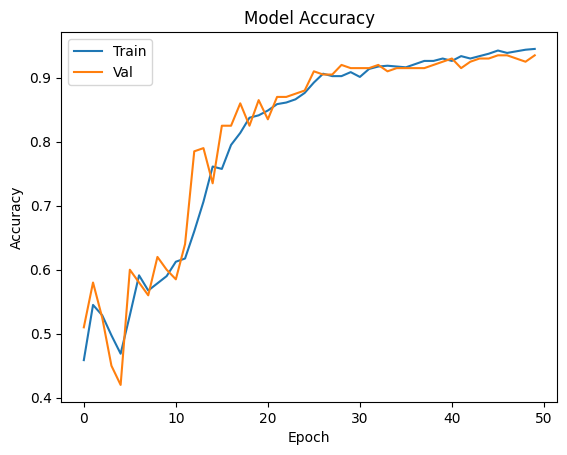

In [12]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [13]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

7/7 [==============================] - 1s 112ms/step - loss: 0.2038 - acc: 0.9350
Accuracy on test set is: 0.9350000023841858


In [14]:
X_test

array([[[-3.74654175e+02],
        [ 1.23826561e+02],
        [ 6.79477997e+01],
        ...,
        [-1.70935047e+00],
        [-1.30632770e+00],
        [-1.58903599e+00]],

       [[-3.80760437e+02],
        [ 1.34752975e+02],
        [ 8.50600891e+01],
        ...,
        [-1.49345303e+00],
        [-1.17494464e+00],
        [-1.95538127e+00]],

       [[-3.96003601e+02],
        [ 1.30348114e+02],
        [ 8.91562576e+01],
        ...,
        [-2.46686411e+00],
        [-1.79454577e+00],
        [-4.21531343e+00]],

       ...,

       [[-4.35744385e+02],
        [ 9.67377930e+01],
        [ 6.77709961e+01],
        ...,
        [-1.37707222e+00],
        [-9.53229547e-01],
        [-1.58146715e+00]],

       [[-3.03425446e+02],
        [ 1.25660927e+02],
        [ 3.42232742e+01],
        ...,
        [-2.06035519e+00],
        [-9.20532882e-01],
        [-1.77819824e+00]],

       [[-3.80969818e+02],
        [ 1.44633698e+02],
        [ 6.73025436e+01],
        ...,
        

In [15]:
model.predict(X_test)

7/7 [==============================] - 2s 78ms/step


array([[0.22675784, 0.17883568, 0.421273  , 0.30302215, 0.9932204 ],
       [0.35526648, 0.5684873 , 0.9392487 , 0.32426614, 0.5358267 ],
       [0.21458565, 0.41858512, 0.9893855 , 0.41703898, 0.30320433],
       [0.30261207, 0.7932288 , 0.9256563 , 0.46245083, 0.16256486],
       [0.22741191, 0.17833047, 0.44109845, 0.29299393, 0.9929125 ],
       [0.1944004 , 0.46326226, 0.9849    , 0.462207  , 0.35617277],
       [0.2364721 , 0.49688745, 0.9505864 , 0.573044  , 0.25112942],
       [0.23184796, 0.1750778 , 0.41366357, 0.30637786, 0.9928515 ],
       [0.36936083, 0.5837273 , 0.87154573, 0.67978704, 0.2739572 ],
       [0.5033519 , 0.9935105 , 0.3426214 , 0.6508274 , 0.12311288],
       [0.65570927, 0.3821049 , 0.12558736, 0.98879695, 0.06653625],
       [0.540522  , 0.9884649 , 0.47397196, 0.57487917, 0.10263009],
       [0.9112423 , 0.59433085, 0.22718778, 0.9724871 , 0.1851919 ],
       [0.5649778 , 0.35035685, 0.1685455 , 0.9853695 , 0.08629388],
       [0.5891631 , 0.35356858, 0.

In [16]:

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 0s 64ms/step


array([[45,  0,  1,  2,  0],
       [ 2, 28,  3,  0,  0],
       [ 0,  0, 36,  1,  1],
       [ 2,  0,  1, 41,  0],
       [ 0,  0,  0,  0, 37]])

In [17]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       1.00      0.85      0.92        33
           2       0.88      0.95      0.91        38
           3       0.93      0.93      0.93        44
           4       0.97      1.00      0.99        37

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.94       200
weighted avg       0.94      0.94      0.93       200



In [21]:
# save h5
model_uri = '../modelh5/model_LSTM.h5'
model.save(model_uri)

In [22]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 40, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 151,237
Trainable params: 151,237
Non-trainable params: 0
_________________________________________________________________


In [25]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

test_uri = "test.csv"

def extract_mfcc(audiofile):
    file = open(test_uri, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    to_append = f'Signal'
    for e in mfcc:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv(test_uri)
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


predictCoba('../data/training/N/New_N_113.wav')

1/1 [==============================] - 1s 1s/step
[0.22181961 0.18141195 0.45601633 0.29389527 0.99272096]
4
Predicted class: N


In [28]:
data = pd.read_csv('test.csv')
data

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,Signal,-419.529449,88.011909,49.764606,29.339155,19.321064,16.386044,10.572832,8.241993,5.835854,...,-8.744209,-5.940906,-4.501851,-4.000758,-3.813454,-2.981442,-1.785498,-0.911396,-1.290133,NaN
